In [6]:
import csv ## модуль для работы с csv
#загрузим из нашей csv-шки 
with open ('textfeatures.csv', newline='',encoding ='utf-8') as inputdata: 
    reader = csv.reader (inputdata,delimiter = ';')
    mytarget = []
    mydata = []
    next(reader)
    for row in reader:
        #print (row)
        mydata.append (row[2:])
        mytarget.append (row[1])
    #print (mydata)
    #print (mytarget)

[['0', '0', '0', '0', '0', '0', '0', '2', '0', '8', '0', '0', '0', '0', '7', '0', '0'], ['1', '2', '0', '1', '0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['6', '0', '4', '7', '2', '3', '2', '2', '0', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '5', '0', '1', '0', '0', '0', '0', '1', '0', '0'], ['0', '0', '0', '4', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '1', '5', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0', '0', '0', '0', '2', '3', '0', '4', '0', '1', '0', '0', '0'], ['0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0'], ['2', '0', '0', '3', '0', '2', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '2', '2', '0', '2', '

In [12]:
from sklearn.model_selection import train_test_split # загрузим 
traindata, testdata, traintarget, testtarget = train_test_split (mydata, mytarget)
#print (len(traintarget))
#print (len(traindata))
#print (traintarget)
#print (traindata)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
moy_klassifikator = KNeighborsClassifier()
moy_klassifikator.fit(traindata, traintarget)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
moy_klassifikator.score(testdata,testtarget)

0.75

In [19]:
prediction = moy_klassifikator.predict(testdata)
for index in range (0,len(prediction)):
    if prediction[index] != testtarget[index]:
        print ('WRONG')
    else:
        print ('Right')

Right
Right
Right
Right
Right
WRONG
WRONG
Right


In [16]:
print (testtarget)


['политика', 'политика', 'политика', 'спорт', 'политика', 'спорт', 'политика', 'спорт']


In [21]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(moy_klassifikator.predict(testdata), testtarget)
print (cnf_matrix)

[[4 1]
 [1 2]]


In [23]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
## Это функция, которая рисует матрицу ошибок; я украл её отсюда не глядя: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4 1]
 [1 2]]


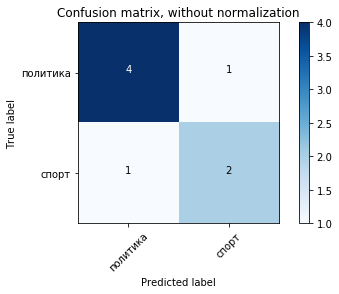

In [24]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(testtarget),
                      title='Confusion matrix, without normalization')
plt.show()


Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.25  0.75]]


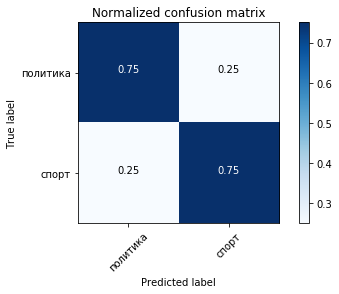

In [72]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(testtarget), normalize=True,
                      title='Normalized confusion matrix')
plt.show()